In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)

In [3]:
df = pd.read_csv('DiabetesType.csv')
df.head()

,Age,BS Fast,BS pp,Plasma R,Plasma F,HbA1c,Type,Class
0,50,6.8,8.8,11.2,7.2,62,Type1,1
1,31,5.2,6.8,10.9,4.2,33,Normal,0
2,32,6.8,8.8,11.2,7.2,62,Type1,1
3,21,5.7,5.8,10.7,4.8,49,Normal,0
4,33,6.8,8.8,11.2,7.2,62,Type1,1


In [4]:
df.info() # The data has benn cleaned, no missing values, represented with their correct datatype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       1009 non-null   int64  
 1   BS Fast   1009 non-null   float64
 2   BS pp     1009 non-null   float64
 3   Plasma R  1009 non-null   float64
 4   Plasma F  1009 non-null   float64
 5   HbA1c     1009 non-null   int64  
 6   Type      1009 non-null   object 
 7   Class     1009 non-null   int64  
dtypes: float64(4), int64(3), object(1)
memory usage: 63.2+ KB


In [5]:
df.describe()

,Age,BS Fast,BS pp,Plasma R,Plasma F,HbA1c,Class
count,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000
mean,33.398414,12.571853,6.659167,10.728741,6.136075,43.481665,0.374628
std,11.633364,12.334019,1.205188,1.436979,1.620659,12.067515,0.484267
min,21.000000,0.000000,4.200000,7.900000,3.900000,28.000000,0.000000
25%,24.000000,5.600000,5.800000,10.200000,4.800000,33.000000,0.000000
50%,29.000000,6.700000,6.800000,10.900000,5.600000,40.000000,0.000000
75%,41.000000,20.000000,7.700000,11.400000,7.800000,53.000000,1.000000
max,81.000000,54.000000,8.800000,13.100000,9.100000,69.000000,1.000000


In [6]:
df

,Age,BS Fast,BS pp,Plasma R,Plasma F,HbA1c,Type,Class
0,50,6.8,8.8,11.2,7.2,62,Type1,1
1,31,5.2,6.8,10.9,4.2,33,Normal,0
2,32,6.8,8.8,11.2,7.2,62,Type1,1
3,21,5.7,5.8,10.7,4.8,49,Normal,0
4,33,6.8,8.8,11.2,7.2,62,Type1,1
...,...,...,...,...,...,...,...,...
1004,37,0.0,5.6,10.2,5.4,32,Normal,0
1005,23,6.3,4.2,12.2,7.8,57,Type2,1
1006,37,32.0,7.4,8.7,5.6,41,Normal,0
1007,46,19.0,6.3,7.9,3.9,40,Normal,0


In [7]:
df.drop('Class', 1, inplace = True)

In [8]:
df

,Age,BS Fast,BS pp,Plasma R,Plasma F,HbA1c,Type
0,50,6.8,8.8,11.2,7.2,62,Type1
1,31,5.2,6.8,10.9,4.2,33,Normal
2,32,6.8,8.8,11.2,7.2,62,Type1
3,21,5.7,5.8,10.7,4.8,49,Normal
4,33,6.8,8.8,11.2,7.2,62,Type1
...,...,...,...,...,...,...,...
1004,37,0.0,5.6,10.2,5.4,32,Normal
1005,23,6.3,4.2,12.2,7.8,57,Type2
1006,37,32.0,7.4,8.7,5.6,41,Normal
1007,46,19.0,6.3,7.9,3.9,40,Normal


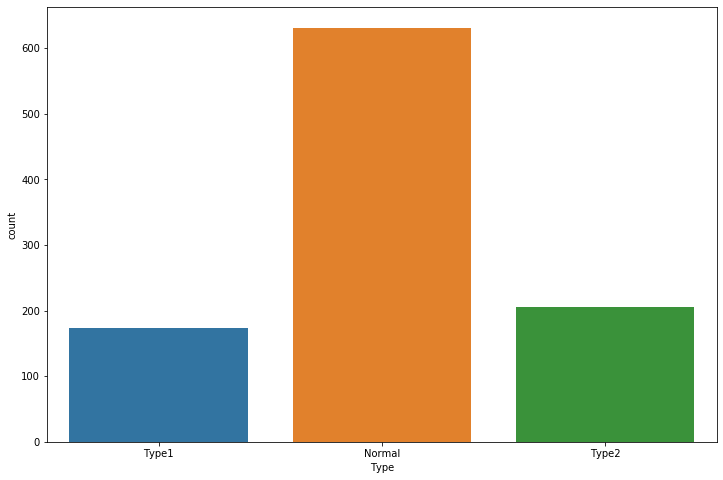

In [9]:
plt.figure(figsize = (12, 8))
sns.countplot(df.Type)

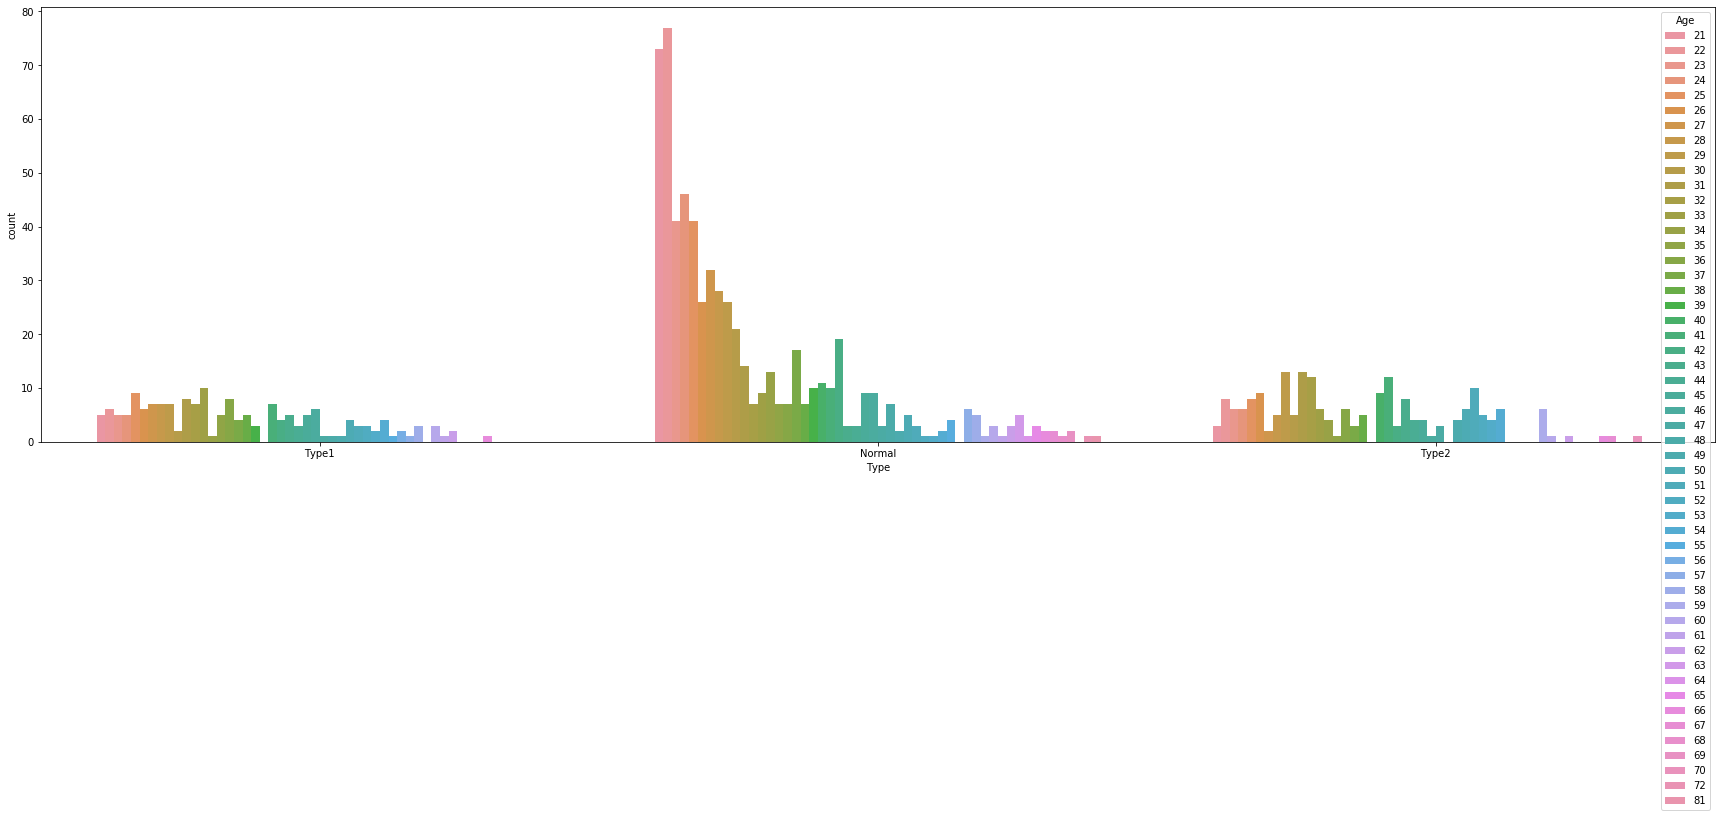

In [11]:
plt.figure(figsize = (30, 8))
sns.countplot(df.Type, hue = df.Age)

Text(0.5, 1.0, 'Box Plot of Age with Blood Sugar Level')

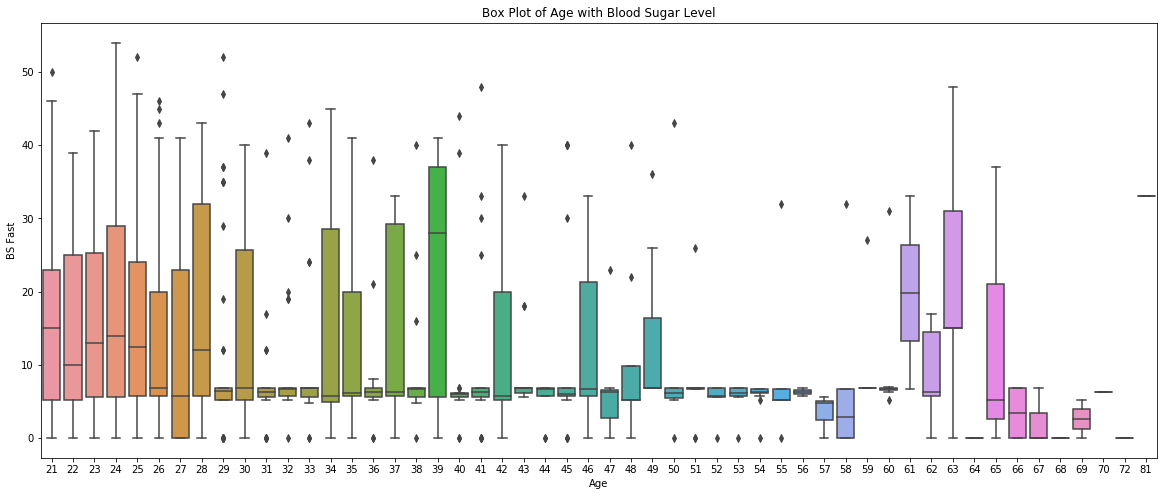

In [13]:
plt.figure(figsize = (20, 8))
sns.boxplot(x = 'Age', y = 'BS Fast', data = df)
plt.title('Box Plot of Age with Blood Sugar Level')

Text(0.5, 1.0, 'Box Plot of Age with Blood Sugar Level')

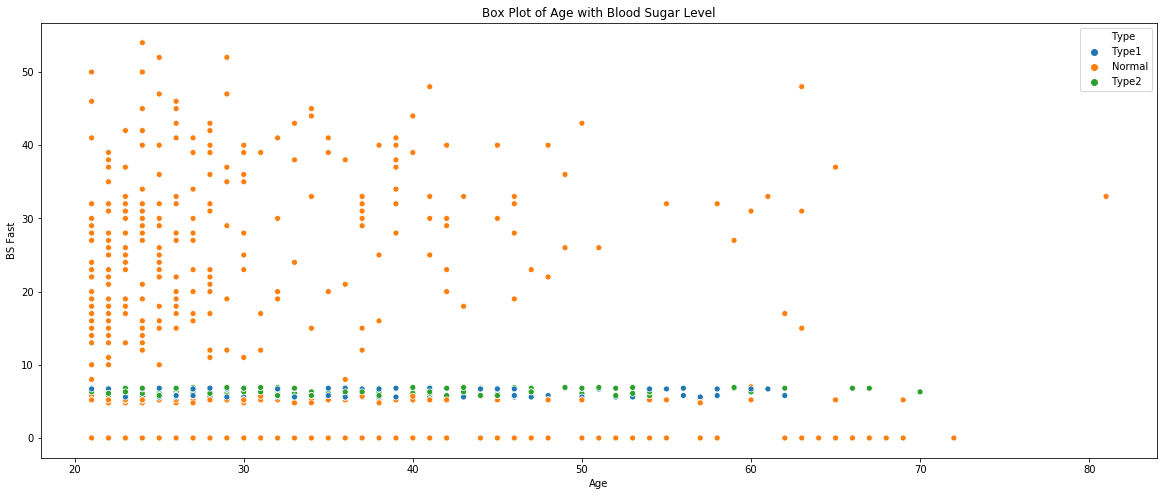

In [15]:
plt.figure(figsize = (20, 8))
sns.scatterplot(x = 'Age', y = 'BS Fast', data = df, hue = 'Type')
plt.title('Box Plot of Age with Blood Sugar Level')

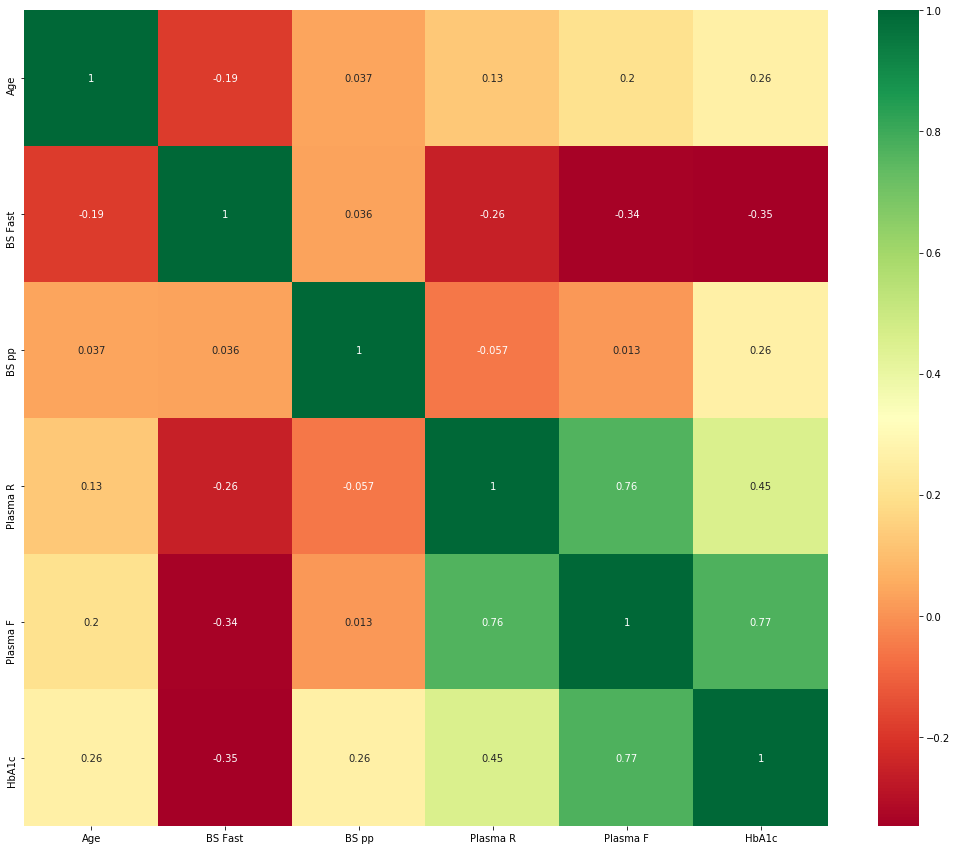

In [18]:
plt.figure(figsize = (18, 15))
sns.heatmap(df.corr(), annot = True, cmap = 'RdYlGn')

In [19]:
# Import the libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble.gradient_boosting import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

In [20]:
X = df.drop('Type', 1)
y = df.iloc[:, -1]

In [22]:
def compute_score(clf, X, y, scoring = 'accuracy'):
    xval = cross_val_score(clf, X, y, cv = 5, scoring = scoring)
    return np.mean(xval) # Cross validation to check for biasness and variance

In [23]:
# Testing different base models
logreg = LogisticRegression()
logreg_cv = LogisticRegressionCV()
rf = RandomForestClassifier()
gboost = GradientBoostingClassifier()
models = [logreg, logreg_cv, rf, gboost]

In [24]:
for model in models:
    print('Cross-validation of : {0}'.format(model.__class__))
    score = compute_score(clf = model, X = X, y = y, scoring = 'accuracy')
    print('CV score = {0}'.format(score))
    print('*****')

Cross-validation of : <class 'sklearn.linear_model._logistic.LogisticRegression'>
CV score = 0.9504359391162996
*****
Cross-validation of : <class 'sklearn.linear_model._logistic.LogisticRegressionCV'>
CV score = 0.9980148761144771
*****
Cross-validation of : <class 'sklearn.ensemble._forest.RandomForestClassifier'>
CV score = 1.0
*****
Cross-validation of : <class 'sklearn.ensemble._gb.GradientBoostingClassifier'>
CV score = 1.0
*****


In [25]:
# Lets try train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)

In [26]:
# Using the random forest algorithm
model = rf.fit(X_train, y_train)

In [27]:
y_pred = model.predict(X_test)

In [28]:
# Check the prediction precision and accuracy
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00       215
       Type1       1.00      1.00      1.00        56
       Type2       1.00      1.00      1.00        62

    accuracy                           1.00       333
   macro avg       1.00      1.00      1.00       333
weighted avg       1.00      1.00      1.00       333



In [29]:
# Saving the model with pickle
import pickle

# save the model to disk
model_name = 'model.pkl'
pickle.dump(model, open(model_name, 'wb'))

print('[INFO]: Finished saving model ...')

[INFO]: Finished saving model ...
